# Introduction to Statistics in Python
https://www.scipy-lectures.org/packages/statistics/index.html

## Importing and Exploring our Data

In [1]:
#import pandas and use magic function
import pandas as pd
%matplotlib inline

In [54]:
# import our data using pandas read_csv() function where delimiter = ';', index_col = 0, na_values = '.'
data = pd.read_csv('https://www.scipy-lectures.org/_downloads/brain_size.csv', 
                   delimiter=';', index_col=0, na_values='.')

In [11]:
# check out our data using pandas df.head() function
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [12]:
# how many observations do we have? use pandas df.shape attribute
data.shape

(40, 7)

In [14]:
# check out one column with df['column name'] or df.column_nae
data.Gender.head()

1    Female
2      Male
3      Male
4      Male
5    Female
Name: Gender, dtype: object

In [15]:
# make a groupby object on the dataframe
groupby_gender = data.groupby('Gender')

In [16]:
# take the mean of the groupby object across all measures using the .mean() method
groupby_gender.mean()

,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
Gender,,,,,,
Female,111.9,109.45,110.45,137.200000,65.765000,862654.6
Male,115.0,115.25,111.60,166.444444,71.431579,954855.4


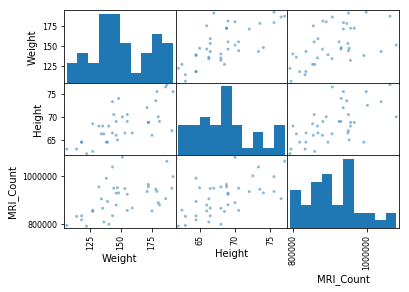

In [24]:
# take a look at our data distributions and pair-wise correlations
from pandas import plotting
plotting.scatter_matrix(data[['Weight', 'Height', 'MRI_Count']]);

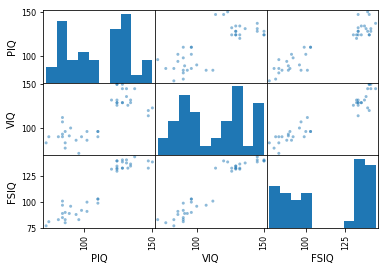

In [25]:
plotting.scatter_matrix(data[['PIQ', 'VIQ', 'FSIQ']]);

In [ ]:
## Distributions and 

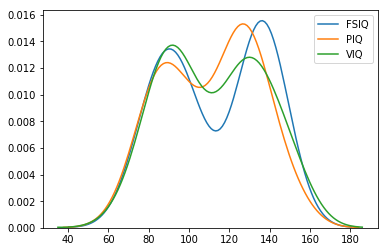

In [123]:
sns.kdeplot(data['FSIQ'])
sns.kdeplot(data['PIQ'])
sns.kdeplot(data['VIQ'])

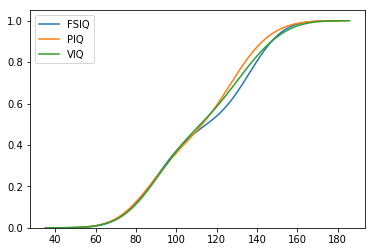

In [124]:
sns.kdeplot(data['FSIQ'],cumulative=True)
sns.kdeplot(data['PIQ'],cumulative=True)
sns.kdeplot(data['VIQ'],cumulative=True)

## Hypothesis Testing

In [28]:
from scipy import stats

### 1-sample t-test: Testing the value of a population mean. 

`scipy.stats.ttest_1samp()` tests if the population mean of data is likely to   
be equal to a given value (technically if observations are drawn from a Gaussian  
distributions of given population mean). It returns the T statistic, and the   
p-value (see the function’s help)

In [29]:
# runa 1 sample t-test
stats.ttest_1samp(data['VIQ'], 0)   

Ttest_1sampResult(statistic=30.088099970849328, pvalue=1.3289196468728067e-28)

### 2-sample t-test: testing for difference across populations
We have seen above that the mean VIQ in the male and female populations were different.  
To test if this is significant, we do a 2-sample t-test with scipy.stats.ttest_ind()

In [30]:
female_viq = data[data['Gender'] == 'Female']['VIQ']
male_viq = data[data['Gender'] == 'Male']['VIQ']
stats.ttest_ind(female_viq, male_viq)   



Ttest_indResult(statistic=-0.7726161723275011, pvalue=0.44452876778583217)

###  Paired tests: repeated measurements on the same indivuals

The PIQ, VIQ and FSIQ are three different measures of IQ in the same individual.   
We can first look if FSIQ and PIQ are different using the 2-sample t-test.

In [32]:
stats.ttest_ind(data['FSIQ'], data['PIQ'])  

Ttest_indResult(statistic=0.465637596380964, pvalue=0.6427725009414841)

However this doesn't account for individual differences contributing to variance in data.  
We can use a **paired t-test** or **repeated measures test** to account for these individual differences.

In [33]:
stats.ttest_rel(data['FSIQ'], data['PIQ'])   

Ttest_relResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

This is actually equivalent to doing a 1-sample t-test on the difference of the two measures.

In [35]:
stats.ttest_1samp(data['FSIQ'] - data['PIQ'], 0)   

Ttest_1sampResult(statistic=1.7842019405859857, pvalue=0.08217263818364236)

These tests assume normality in the data. A non-parametric alternative is the Wilcoxian signed rank test

In [36]:
stats.wilcoxon(data['FSIQ'], data['PIQ'])   

WilcoxonResult(statistic=274.5, pvalue=0.10659492713506856)

Note: 
The corresponding test in the non paired case is the Mann–Whitney U test, `scipy.stats.mannwhitneyu()`. 

## Linear models, multiple factors, and analysis of variance

Given two set of observations, x and y, we want to test the hypothesis that y is a linear function of x.
We will use the statsmodels module to:

1. Fit a linear model. We will use the simplest strategy, ordinary least squares (OLS).
2. Test that coef is non zero.


In [52]:
# Let's simulate some data according to the model
import numpy as np

x = np.linspace(-5, 5, 20)
np.random.seed(1)

# normal distributed noise
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)

# Create a data frame containing all the relevant variables
sim_data = pd.DataFrame({'x': x, 'y': y})

In [53]:
# Specify an OLS model and fit it
from statsmodels.formula.api import ols
model = ols("y ~ x", sim_data).fit()

In [46]:
# Inspect the results of the model fit
print(model.summary()) 

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           8.56e-08
Time:                        11:51:32   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0

In [48]:
# Retrieve the model params, note tab completion
model.params

Intercept   -5.533459
x            2.936888
dtype: float64

### Categorical variables: comparing groups or multiple categories

In [55]:
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [62]:
# We can write a comparison between IQ of male and female using a linear model:

model = ols("VIQ ~ Gender", data).fit()

# ols automatically detects Gender as categorical
# model = ols('VIQ ~ C(Gender)', data).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    VIQ   R-squared:                       0.015
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.5969
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.445
Time:                        11:56:48   Log-Likelihood:                -182.42
No. Observations:                  40   AIC:                             368.8
Df Residuals:                      38   BIC:                             372.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        109.4500      5.308     20.

### Link to t-tests between different FSIQ and PIQ

To compare different types of IQ, we need to create a “long-form” table,   
listing IQs, where the type of IQ is indicated by a categorical variable:



In [79]:
iq_melt = pd.melt(data, value_vars=['FSIQ', 'PIQ'], value_name='iq', var_name="type")

In [80]:
iq_melt.head()

,type,iq
0,FSIQ,133
1,FSIQ,140
2,FSIQ,139
3,FSIQ,133
4,FSIQ,137


In [81]:
model = ols("iq ~ type", iq_melt).fit()
print(model.summary())  



                            OLS Regression Results                            
Dep. Variable:                     iq   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.010
Method:                 Least Squares   F-statistic:                    0.2168
Date:                Thu, 06 Dec 2018   Prob (F-statistic):              0.643
Time:                        12:05:30   Log-Likelihood:                -364.35
No. Observations:                  80   AIC:                             732.7
Df Residuals:                      78   BIC:                             737.5
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     113.4500      3.683     30.807      

Note that we can get the same results now of doing the independant t-tests for each pariing. 

In [82]:
stats.ttest_ind(data['VIQ'], data['PIQ']) 

Ttest_indResult(statistic=0.2570673685607642, pvalue=0.7978036781233253)

### Multiple Regression: including multiple factors

In [85]:
iris = pd.read_csv('https://www.scipy-lectures.org/_downloads/iris.csv')

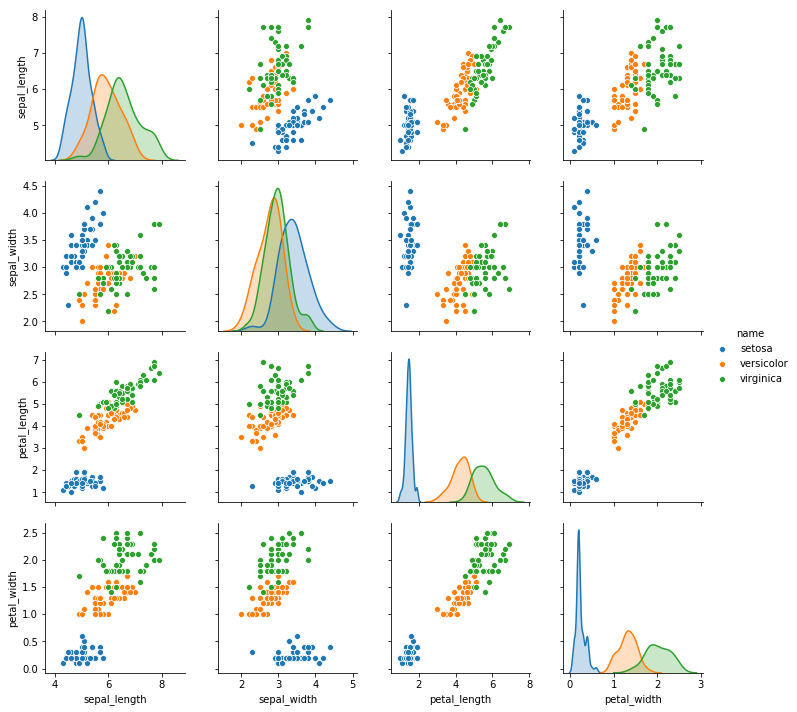

In [93]:
import seaborn as sns
sns.pairplot(iris, hue='name');

Sepal and petal size tend to be related: bigger flowers are bigger!  
But is there in addition a systematic effect of species?

In [95]:
model = ols('sepal_width ~ name + petal_length', iris).fit()
print(model.summary())  


                            OLS Regression Results                            
Dep. Variable:            sepal_width   R-squared:                       0.478
Model:                            OLS   Adj. R-squared:                  0.468
Method:                 Least Squares   F-statistic:                     44.63
Date:                Thu, 06 Dec 2018   Prob (F-statistic):           1.58e-20
Time:                        12:10:56   Log-Likelihood:                -38.185
No. Observations:                 150   AIC:                             84.37
Df Residuals:                     146   BIC:                             96.41
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              2.9813      0

### Analysis of Variance (ANOVA)
#### 1-Way Anova

In [103]:
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


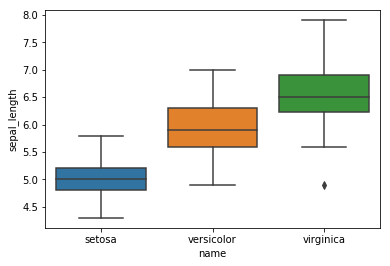

In [109]:
sns.boxplot('name', "sepal_length", data=iris)

In [111]:
setosa = iris[iris['name'] == 'setosa']['sepal_length']
versicolor = iris[iris['name'] == 'versicolor']['sepal_length']
virginica = iris[iris['name'] == 'virginica']['sepal_length']

In [112]:
f_value, p_value = stats.f_oneway(setosa, versicolor, virginica)

In [117]:
print(f_value, p_value)

119.26450218450468 1.6696691907693826e-31


In [134]:
data.head()

,Gender,FSIQ,VIQ,PIQ,Weight,Height,MRI_Count
1,Female,133,132,124,118.0,64.5,816932
2,Male,140,150,124,NaN,72.5,1001121
3,Male,139,123,150,143.0,73.3,1038437
4,Male,133,129,128,172.0,68.8,965353
5,Female,137,132,134,147.0,65.0,951545


In [136]:
data = data.dropna(axis=0, how='any')

In [141]:
data.isna().sum()

Gender       0
FSIQ         0
VIQ          0
PIQ          0
Weight       0
Height       0
MRI_Count    0
dtype: int64

In [147]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('sepal_length ~ name',
                data=iris).fit();
                
aov_table = sm.stats.anova_lm(mod, typ=2);
print(aov_table);

             sum_sq     df           F        PR(>F)
name      63.212133    2.0  119.264502  1.669669e-31
Residual  38.956200  147.0         NaN           NaN
